### 1) WoS의 Domain은 몇개이며, 어떤 Domain으로 이루어져있는지 확인해봅시다.

In [2]:
#load data
import json

eval_data = json.load(open("/opt/ml/input/data/eval_dataset/eval_dials.json"))
train_data = json.load(open("/opt/ml/input/data/train_dataset/train_dials.json"))
slot_meta = json.load(open("/opt/ml/input/data/train_dataset/slot_meta.json"))
ontology = json.load(open("/opt/ml/input/data/train_dataset/ontology.json"))

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
  
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=14)
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [4]:
# draw graph
import matplotlib.pyplot as plt
import numpy as np
from importlib import import_module
import matplotlib as mpl

def draw_graph(data):
    '''
    draw_type:str 을 입력으로 받아 그래프를 출력하는 함수입니다.
    '''
    
    x, y = data.keys(), data.values()
    index = np.arange(5)
    
    plt.bar(index, y)
    plt.xticks(index, x)
    plt.title("WOS_Domain")
    plt.show()

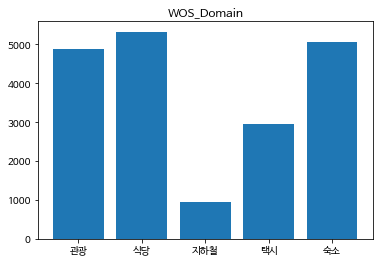

In [5]:
from collections import defaultdict
import matplotlib.font_manager as fm

domains = defaultdict(int)
dataset = train_data+eval_data
for dialogue in dataset:
    for d in dialogue["domains"]:
        domains[d] += 1
draw_graph(domains)

### 2) WoS의 Slot은 몇개이며, Domain별로 어떤 Slot으로 이루어져있는지 확인해봅니다.

In [6]:
#slot_meta 개수
print(len(slot_meta))
slot_meta

slot_dict = defaultdict(list)
for dom_slot in slot_meta:
    dom, slot = dom_slot.split("-")
    slot_dict[dom].append(slot)
slot_dict

45


defaultdict(list,
            {'관광': ['경치 좋은',
              '교육적',
              '도보 가능',
              '문화 예술',
              '역사적',
              '이름',
              '종류',
              '주차 가능',
              '지역'],
             '숙소': ['가격대',
              '도보 가능',
              '수영장 유무',
              '스파 유무',
              '예약 기간',
              '예약 명수',
              '예약 요일',
              '이름',
              '인터넷 가능',
              '조식 가능',
              '종류',
              '주차 가능',
              '지역',
              '헬스장 유무',
              '흡연 가능'],
             '식당': ['가격대',
              '도보 가능',
              '야외석 유무',
              '예약 명수',
              '예약 시간',
              '예약 요일',
              '이름',
              '인터넷 가능',
              '종류',
              '주류 판매',
              '주차 가능',
              '지역',
              '흡연 가능'],
             '지하철': ['도착지', '출발 시간', '출발지'],
             '택시': ['도착 시간', '도착지', '종류', '출발 시간', '출발지']})

### 3) WoS의 Value은 몇개이며, Slot당 Value가 어떻게 이루어져있는지 확인해봅니다.

In [103]:
for slot in ontology:
    print("{slot}의 value 개수 : {len(ontology[slot])}개")




{'관광-경치 좋은': ['none', 'dontcare', 'yes', 'no'],
 '관광-교육적': ['none', 'dontcare', 'no', 'yes'],
 '관광-도보 가능': ['none', 'dontcare', 'no', 'yes'],
 '관광-문화 예술': ['none', 'dontcare', 'no', 'yes'],
 '관광-역사적': ['none', 'dontcare', 'no', 'yes'],
 '관광-이름': ['none',
  'dontcare',
  '북한산 국립공원',
  '한국 전쟁 기념관',
  '명동난타극장',
  '국립중앙박물관',
  '그레뱅뮤지엄',
  '경복궁',
  '창덕궁',
  '여의도 한강공원',
  '잠실 야구 경기장',
  '한강 공원',
  '하늘공원',
  '봉은사',
  '서울숲',
  '조계사',
  '서울 한양 도성',
  '창경궁',
  '롯데월드타워&몰',
  '삼성미술관 리움',
  '이화여자대학교',
  '남산 공원',
  '서울 역사 박물관',
  '트릭아이뮤지엄 서울',
  '명동 성당',
  '별마당 도서관',
  '여의도 공원',
  '홍대앞 거리',
  '명동 쇼핑 거리',
  '서울스카이',
  '서울 어린이 대공원',
  '청계천',
  '낙산공원',
  '올림픽 공원',
  '예술의전당',
  '국립 민속 박물관',
  '서대문 형무소 역사관',
  '인사동',
  '삼청동길',
  '국립현대미술관 서울관',
  'N 서울 타워',
  '동대문 디자인 플라자',
  '광화문',
  '덕수궁',
  '북촌 한옥마을',
  '롯데월드 아쿠아리움',
  '홍대앞 예술시장 프리마켓',
  '국립 고궁 박물관',
  '러브뮤지엄',
  '광장시장',
  '종묘',
  '고투 몰',
  '동대문 역사 문화 공원',
  '남산골 한옥 마을',
  '광화문 광장',
  '서울중앙성원',
  '신세계 백화점 본점',
  '타임스퀘어',
  '이화 벽화마을',
  '코엑스 아쿠아리움',
  '